In [283]:
import numpy as np
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.impute import SimpleImputer

In [284]:
df = pd.read_csv("Data/The Heart Failure Prediction Dataset.csv")

In [285]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [286]:
#EDA

df.describe(include='O')

,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,Smoking,Family.History,HTN,Allergies,Others,CO,Diagnosis,Hypersensitivity,SK.React
count,368,368,352,368,361,368,368,368,354,354,368,368,368,367,368,176,368,368
unique,5,2,2,2,2,2,2,2,2,2,2,2,2,17,37,37,2,7
top,51-60,Male,URBAN,MARRIED,YES,NO,FREE,YES,YES,YES,NO,YES,NO,no,"Chest pain,",AC I/W M.I,NO,COUGH.BLEEDING
freq,184,285,223,365,213,224,331,351,328,190,296,201,357,200,84,18,356,146


In [287]:
print(df.shape)

(368, 60)


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  352 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

Age                                                                                           0
Age.Group                                                                                     0
Gender                                                                                        0
Locality                                                                                     16
Marital status                                                                                0
Life.Style                                                                                    7
Sleep                                                                                         0
Category                                                                                      0
Depression                                                                                    0
Hyperlipi                                                                                    14
Smoking                                 

<AxesSubplot:>

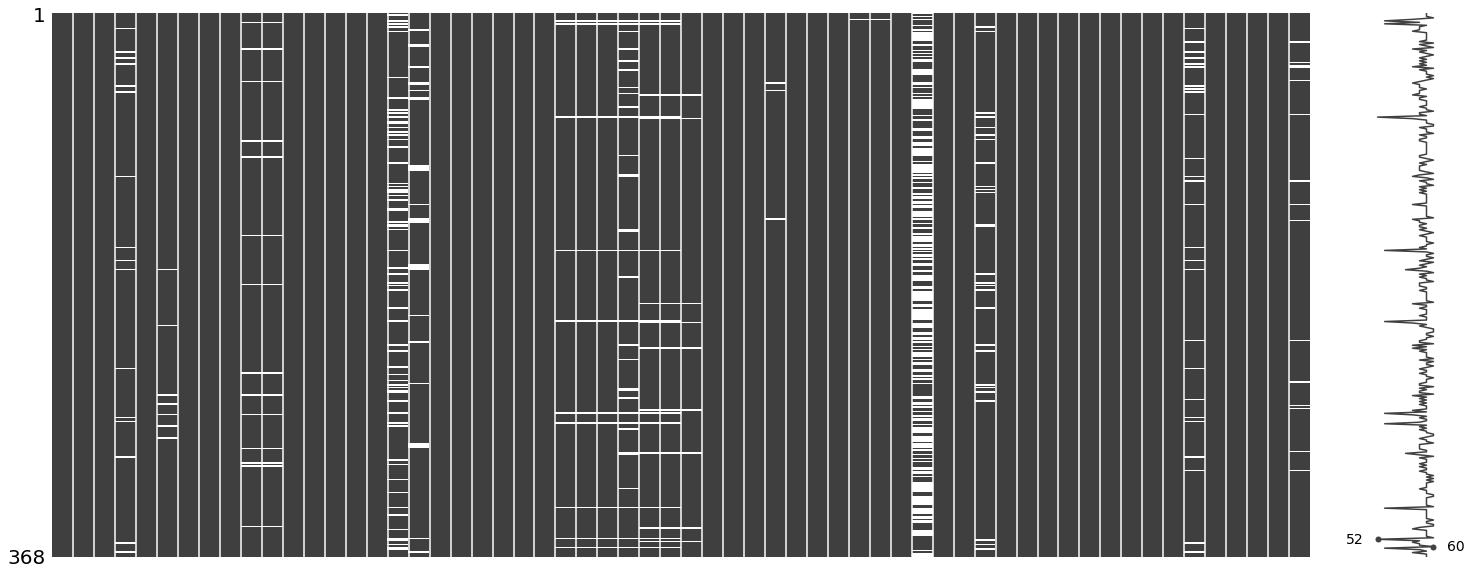

In [289]:
# Identify the count of missing values and display it with the matrix
print(df.isna().sum())
msno.matrix(df)

In [290]:
# Display the number of unique values for each column
print(df.nunique())

Age                                                                                         31
Age.Group                                                                                    5
Gender                                                                                       2
Locality                                                                                     2
Marital status                                                                               2
Life.Style                                                                                   2
Sleep                                                                                        2
Category                                                                                     2
Depression                                                                                   2
Hyperlipi                                                                                    2
Smoking                                           

Text(0, 0.5, 'Frequency of Mortality')

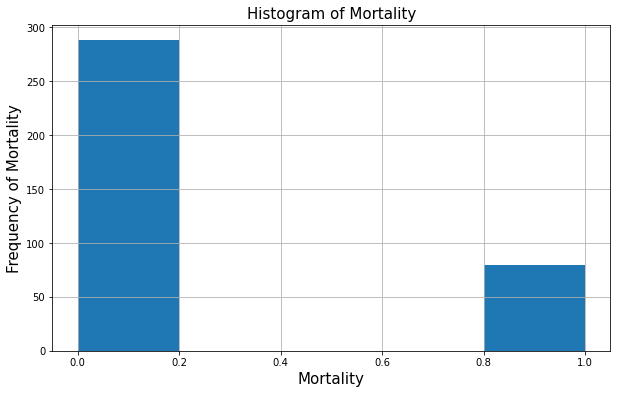

In [291]:
df['Mortality'].hist(bins=5, figsize=(10, 6))
plt.title('Histogram of Mortality', size=15)
plt.xlabel('Mortality', size=15)
plt.ylabel('Frequency of Mortality', size = 15)

In [292]:
df['Mortality'].value_counts(dropna=False)

0    288
1     80
Name: Mortality, dtype: int64

In [293]:
df.duplicated().any()

True

In [294]:
df.duplicated().sum()

74

In [295]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

In [296]:
df.duplicated().any()

False

In [297]:
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [298]:
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

In [299]:
df.columns = df.columns.str.replace(".", "")

/var/folders/3l/g355y8_x43xf03wyg8tjr0m80000gn/T/ipykernel_49653/1228515619.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(".", "")


In [300]:
df.columns = df.columns.str.replace(" ", "")

In [301]:
df.loc[:, ['FamilyHistory', 'FHistory']]

,FamilyHistory,FHistory
0,NO,0
1,NO,0
2,NO,0
3,NO,0
4,NO,0
...,...,...
363,NO,0
364,YES,1
365,NO,0
366,YES,1


In [302]:
df.loc[df['FamilyHistory'] == 'NO', ['FHistory']]

,FHistory
0,0
1,0
2,0
3,0
4,0
...,...
361,0
362,0
363,0
365,0


In [303]:
print(df.loc[df['FamilyHistory'] == 'NO', ['FHistory']].nunique())

FHistory    1
dtype: int64


In [304]:
df = df.drop(columns = 'FamilyHistory')

# df = df.drop('FamilyHistory', axis = 1) axis 는 무슨 의미?

In [305]:
df.columns

Index(['Age', 'AgeGroup', 'Gender', 'Locality', 'Maritalstatus', 'LifeStyle',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking', 'FHistory',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'BUrea',
       'SCr', 'SSodium', 'SPotassium', 'SChloride', 'CPK', 'CKMB', 'ESR',
       'WBC', 'RBC', 'Hemoglobin', 'PCV', 'MCV', 'MCH', 'MCHC',
       'PLATELET_COUNT', 'NEUTROPHIL', 'LYMPHO', 'MONOCYTE', 'EOSINO',
       'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'cp', 'trestbps',
       'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'num', 'SK', 'SKReact', 'Reaction', 'Mortality', 'FollowUp'],
      dtype='object')

In [306]:
list_cols = df.columns

In [307]:
# Create a list of columns containing only two unique values

two_val_list = []

for i in list_cols:
    if df[i].nunique() == 2:
        two_val_list.append(i)

In [308]:
for i in two_val_list:
    print(f'Column name: {i}\n Values:\n{df[i].value_counts(dropna=False)}\n\n')

Column name: Gender
 Values:
Male      231
Female     63
Name: Gender, dtype: int64


Column name: Locality
 Values:
URBAN    176
RURAL    104
NaN       14
Name: Locality, dtype: int64


Column name: Maritalstatus
 Values:
MARRIED    291
SINGLE       3
Name: Maritalstatus, dtype: int64


Column name: LifeStyle
 Values:
YES    168
NO     119
NaN      7
Name: LifeStyle, dtype: int64


Column name: Sleep
 Values:
NO     178
YES    116
Name: Sleep, dtype: int64


Column name: Category
 Values:
FREE    266
PAID     28
Name: Category, dtype: int64


Column name: Depression
 Values:
YES    280
NO      14
Name: Depression, dtype: int64


Column name: Hyperlipi
 Values:
YES    261
NO      20
NaN     13
Name: Hyperlipi, dtype: int64


Column name: Smoking
 Values:
YES    154
NO     127
NaN     13
Name: Smoking, dtype: int64


Column name: FHistory
 Values:
0    238
1     56
Name: FHistory, dtype: int64


Column name: Diabetes
 Values:
0    163
1    131
Name: Diabetes, dtype: int64


Column name:

In [309]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [310]:
# Create a list of columns which have missing values in it
null_list = df.columns[df.isna().any()].tolist()

In [311]:
null_list

['Locality',
 'LifeStyle',
 'Hyperlipi',
 'Smoking',
 'BP',
 'Thrombolysis',
 'CPK',
 'CKMB',
 'ESR',
 'WBC',
 'RBC',
 'Hemoglobin',
 'PCV',
 'PLATELET_COUNT',
 'EOSINO',
 'Others',
 'Diagnosis',
 'trestbps',
 'num',
 'FollowUp']

In [312]:
# Find a list of columns which have missing values AND its dtype is object
null_cat_list = []

for i in null_list:
    if df[i].dtypes == 'object':
        null_cat_list.append(i)

In [313]:
null_cat_list

['Locality', 'LifeStyle', 'Hyperlipi', 'Smoking', 'Others', 'Diagnosis']

In [314]:
# For imputation, we will create a function.

def categorical_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])
    
    # OR
    
#     imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     df[col] = imputer.fit_transform(df[col].values.reshape(-1,1))[:,0]

In [315]:
for i in null_cat_list:
    categorical_imputer(df, i)

In [316]:
df.head()

,Age,AgeGroup,Gender,Locality,Maritalstatus,LifeStyle,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SKReact,Reaction,Mortality,FollowUp
0,24,21-30,Female,URBAN,MARRIED,NO,NO,FREE,NO,YES,...,1.6,2,0,7,1.0,1,NO,0,0,1.0
1,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
2,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
3,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0
4,24,21-30,Male,URBAN,MARRIED,YES,YES,FREE,YES,YES,...,1.6,2,0,7,1.0,1,COUGH.BLEEDING,1,0,5.0


In [317]:
# categorical value 랑 non_cat 구분 후 null 찾아 null 없애기

# numeric types : int, float, complex
non_cat_null_list = list(set(null_list) - set(null_cat_list))
df[non_cat_null_list].dtypes

CKMB              float64
ESR               float64
Hemoglobin        float64
trestbps          float64
CPK               float64
Thrombolysis      float64
num               float64
EOSINO            float64
WBC               float64
FollowUp          float64
PCV               float64
PLATELET_COUNT    float64
RBC               float64
BP                float64
dtype: object

array([[<AxesSubplot:title={'center':'CKMB'}>,
        <AxesSubplot:title={'center':'ESR'}>,
        <AxesSubplot:title={'center':'Hemoglobin'}>],
       [<AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'CPK'}>,
        <AxesSubplot:title={'center':'Thrombolysis'}>],
       [<AxesSubplot:title={'center':'num'}>,
        <AxesSubplot:title={'center':'EOSINO'}>,
        <AxesSubplot:title={'center':'WBC'}>],
       [<AxesSubplot:title={'center':'FollowUp'}>,
        <AxesSubplot:title={'center':'PCV'}>,
        <AxesSubplot:title={'center':'PLATELET_COUNT'}>],
       [<AxesSubplot:title={'center':'RBC'}>,
        <AxesSubplot:title={'center':'BP'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

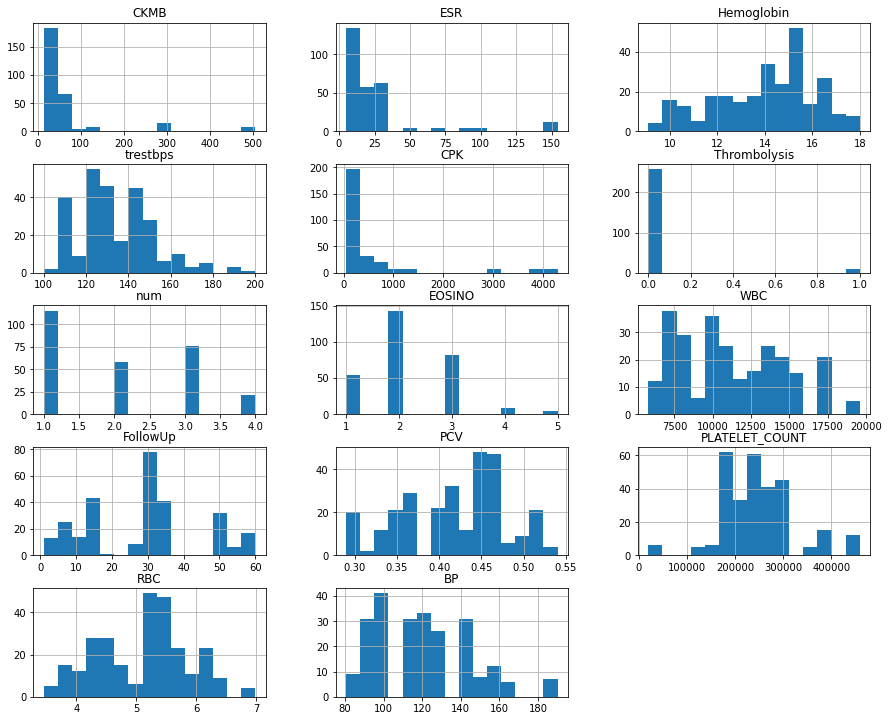

In [318]:
df[non_cat_null_list].hist(bins=15, figsize=(15, 15), layout=(6, 3))

In [319]:
# null_ncat_list = [x for x in null_list if x not in null_cat_list]

# # Or

# # null_ncat_list = []
# # for i in null_list:
# #     if i not in null_cat_list:
# #         null_ncat_list.append(i)


# for i in null_ncat_list:
#     print(f"{i}'s data type: '{df[i].dtypes}")

내가 한 것

num_val_list = []
for i in num_val:
    if df[i].dtypes == 'int64'or 'float64':
        num_val_list.append(i)

num_val_list = [i for i in num_val_list if i not in two_val_list]

for i in num_val_list:
    df[i].hist(bins=10, figsize=(10, 5))
    plt.xlabel(i)
    plt.ylabel("counts")
    plt.show()

In [320]:
def numerical_imputer (data_table, col):
    """
    Impute null values in categorical variable with the most frequently observed value.
    
    Input parameter:
    data_table: dataframe
    col: object column with null value
    """
    
    imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
    data_table[col] = imputer.fit_transform(df[[col]])

In [321]:
for i in non_cat_null_list:
    numerical_imputer(df, i)

In [322]:
df.isna().sum()

Age                 0
AgeGroup            0
Gender              0
Locality            0
Maritalstatus       0
LifeStyle           0
Sleep               0
Category            0
Depression          0
Hyperlipi           0
Smoking             0
FHistory            0
Diabetes            0
HTN                 0
Allergies           0
BP                  0
Thrombolysis        0
BGR                 0
BUrea               0
SCr                 0
SSodium             0
SPotassium          0
SChloride           0
CPK                 0
CKMB                0
ESR                 0
WBC                 0
RBC                 0
Hemoglobin          0
PCV                 0
MCV                 0
MCH                 0
MCHC                0
PLATELET_COUNT      0
NEUTROPHIL          0
LYMPHO              0
MONOCYTE            0
EOSINO              0
Others              0
CO                  0
Diagnosis           0
Hypersensitivity    0
cp                  0
trestbps            0
chol                0
fbs       

In [323]:
# Example of how to convert string to numerical - only for columns with two unique values
# We will talk about how to convert object columns which have more than 2 unique values later
df['Gender'] = df['Gender'].map({'Female':1, 'Male':0})
df['Locality'] = df['Locality'].map({'URBAN':1, 'RURAL':0})
df['Maritalstatus'] = df['Maritalstatus'].map({'MARRIED':1, 'SINGLE':0})
df['LifeStyle'] = df['LifeStyle'].map({'YES':1, 'NO':0})
df['Sleep'] = df['Sleep'].map({'YES':1, 'NO':0})
df['Category'] = df['Category'].map({'PAID':1, 'FREE':0})
df['Depression'] = df['Depression'].map({'YES':1, 'NO':0})
df['Hyperlipi'] = df['Hyperlipi'].map({'YES':1, 'NO':0})
df['Smoking'] = df['Smoking'].map({'YES':1, 'NO':0})
df['HTN'] = df['HTN'].map({'YES':1, 'NO':0})
df['Allergies'] = df['Allergies'].map({'YES':1, 'NO':0})
df['Hypersensitivity'] = df['Hypersensitivity'].map({'YES':1, 'NO':0})


#Column name: Thrombolysis
# Values:
#0.0    257
#NaN     27
#1.0     10
#Name: Thrombolysis, dtype: int64